# ***Loading graphs into NetworkX from different types of sources***
------------------------------
------------------------------

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_uppercase
import random

np.random.seed(2023 - 2 - 12)
plt.rcParams["figure.figsize"] = 7.5, 7.5

## **1. Adjacency list format**
----------------------------
**Useful for graphs w/o node or edge attributes.**

In [3]:
# First label in each line is the source node (central)
# and the subsequent labels are connected nodes (neighbours)
# e.g the first line 0 1 2 3 5 means that the node 0 is directly connected to nodes 1 2 3 & 5.
# subsequent lines include only the connections not included before.
# e.g since the connection between 0 & 1 was included in the first line, it is not included in the second.
# the second line reads that the node 1 is directly connected to nodes 3 and 6, in addition to 0 :)

In [4]:
!type "D:\Applied-Social-Network-Analysis-in-Python\resources\G_adjlist.txt"

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [5]:
graph = nx.read_adjlist(r"D:/Applied-Social-Network-Analysis-in-Python/resources/G_adjlist.txt")

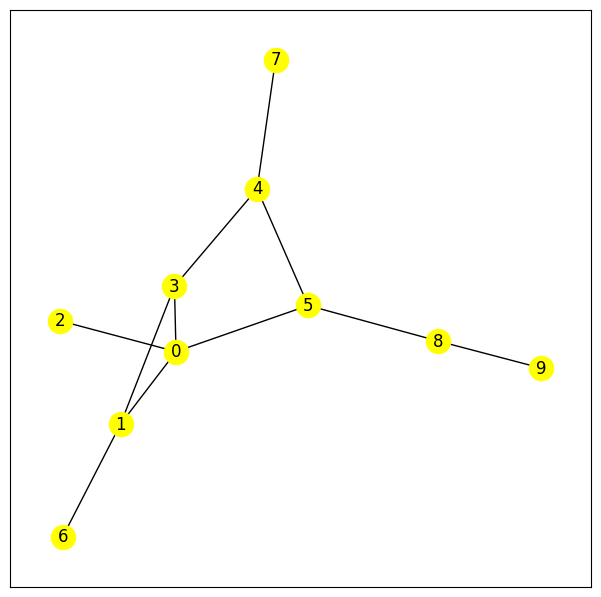

In [6]:
nx.draw_networkx(graph, node_color = "yellow")

In [7]:
graph.edges()

EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '5'), ('1', '3'), ('1', '6'), ('3', '4'), ('5', '4'), ('5', '8'), ('4', '7'), ('8', '9')])

In [8]:
# read in the nodes as integers instead of the default strings
graph = nx.read_adjlist(r"D:/Applied-Social-Network-Analysis-in-Python/resources/G_adjlist.txt", nodetype = np.int64)

In [9]:
graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

## **2. Adjacency matrix format**
-------------------
**Each element in the adjacency matrix indicates whether a pair of nodes are adjacent i.e the matrix is essentially a boolean matrix.**

In [10]:
adj_matrix = np.random.randint(0, 2, size = [10, 10])

In [11]:
adj_matrix

array([[1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 0]])

In [12]:
# each row & column corresponds to each node in the network
# the first row, designated to node 0 tells us that it is adjacent to nodes 0, 1, 4, 5, 8 & 9
# these self connections are an artifact of our random number generation :(

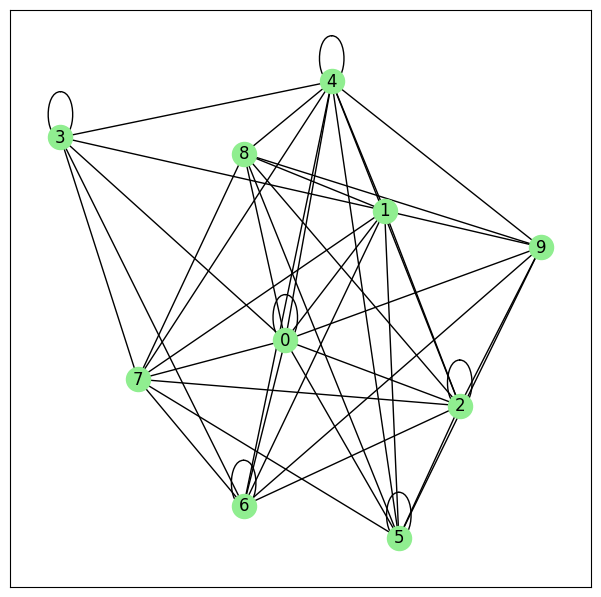

In [13]:
graph = nx.Graph(adj_matrix)
nx.draw_networkx(graph, node_color = "lightgreen")

In [14]:
graph.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 8), (0, 9), (0, 4), (0, 7), (1, 2), (1, 4), (1, 5), (1, 7), (1, 8), (1, 3), (1, 6), (1, 9), (2, 2), (2, 4), (2, 6), (2, 7), (2, 8), (2, 5), (2, 9), (3, 3), (3, 4), (3, 6), (3, 7), (4, 4), (4, 5), (4, 6), (4, 8), (4, 9), (4, 7), (5, 5), (5, 7), (5, 9), (5, 8), (6, 6), (6, 7), (6, 9), (7, 8), (8, 9)])

## **3. Edge list format**
-------------------------------------------
**Useful for graphs with simple edge attributes and without node attributes and not good for netwerks with isolated nodes. In edge lists we can have additionalcolumns for edge attributes.**

In [15]:
!type "D:\Applied-Social-Network-Analysis-in-Python\resources\G_edgelist.txt"

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [16]:
graph = nx.read_edgelist(r"D:/Applied-Social-Network-Analysis-in-Python/resources/G_edgelist.txt", data = [("weight", np.int64)],
                         nodetype = np.int64)

In [17]:
graph.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

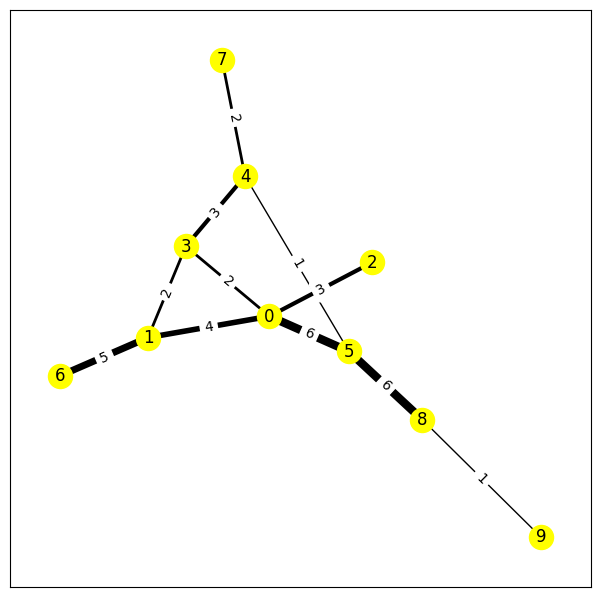

In [18]:
posit = nx.spring_layout(graph)

nx.draw_networkx(graph, node_color = "yellow", pos = posit, width = list(nx.get_edge_attributes(graph, name = "weight").values()))
nx.draw_networkx_edge_labels(graph, pos = posit, edge_labels = nx.get_edge_attributes(graph, name = "weight"))
plt.show()

## **4. Pandas DataFrame**
-------------------------
**DataFrame must be in a format similar to edge lists.**

In [19]:
data = pd.DataFrame(data = {"Node_1": [random.choice(ascii_uppercase) for _ in range(20)],
                     "Node_2": [random.choice(ascii_uppercase) for _ in range(20)],
                     "Weight": np.random.randint(1, 10, 20)}).drop_duplicates()

In [20]:
graph = nx.from_pandas_edgelist(data, source = "Node_1", target = "Node_2", edge_attr = "Weight")

In [21]:
graph.edges()

EdgeView([('U', 'N'), ('U', 'E'), ('N', 'X'), ('N', 'S'), ('Y', 'Q'), ('H', 'X'), ('C', 'T'), ('C', 'R'), ('C', 'Z'), ('C', 'K'), ('T', 'A'), ('T', 'Z'), ('Z', 'S'), ('S', 'L'), ('E', 'D'), ('G', 'D'), ('F', 'F'), ('O', 'M')])

In [22]:
nx.get_edge_attributes(graph, name = "Weight")

{('U', 'N'): 3,
 ('U', 'E'): 9,
 ('N', 'X'): 9,
 ('N', 'S'): 1,
 ('Y', 'Q'): 5,
 ('H', 'X'): 3,
 ('C', 'T'): 2,
 ('C', 'R'): 3,
 ('C', 'Z'): 6,
 ('C', 'K'): 9,
 ('T', 'A'): 9,
 ('T', 'Z'): 8,
 ('Z', 'S'): 8,
 ('S', 'L'): 7,
 ('E', 'D'): 8,
 ('G', 'D'): 5,
 ('F', 'F'): 6,
 ('O', 'M'): 8}

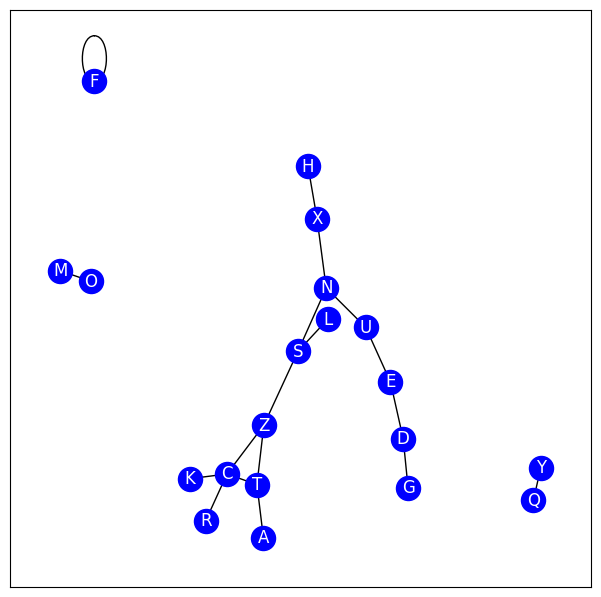

In [23]:
nx.draw_networkx(graph, node_color = "blue", font_color = "white")

# ***A complex example***
---------------------

In [24]:
!pwsh.exe -c "&Get-Content "D:\Applied-Social-Network-Analysis-in-Python\resources\chess_graph.txt" -TotalCount 20"

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997
7 8 0	885635999.999997
7 9 1	885635999.999997
7 10 1	885635999.999997
11 12 -1	885635999.999997
13 14 1	885635999.999997
15 16 1	885635999.999997
17 18 -1	885635999.999997
19 7 0	885635999.999997
19 8 0	885635999.999997
19 20 -1	885635999.999997
19 21 -1	885635999.999997
19 22 1	885635999.999997
23 1 -1	885635999.999997
23 2 -1	885635999.999997
23 3 1	885635999.999997


In [25]:
# each node represents a chess player
# and a directed edge represents a game
# white player - first column (outgoing edge)
# black player - second column (incoming edge)
# third column - weight (outcomes: 1 - white win, 0 - draw and -1 - black win)
# fourth column - timestamps

In [26]:
# we need a multi directed graph here as we are interested in the directions

chess = nx.read_edgelist(r"D:/Applied-Social-Network-Analysis-in-Python/resources/chess_graph.txt",
                        data = [("result", np.int8), ("timestamp", np.float64)], create_using = nx.MultiDiGraph())

In [27]:
len(chess.edges())

65053

In [28]:
chess.is_directed()

True

In [29]:
chess.is_multigraph()

True

In [30]:
list(chess.edges(data = True))[:10]

[('1', '2', {'result': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'result': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'result': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'result': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'result': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'result': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'result': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'result': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'result': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'result': 0, 'timestamp': 906660000.0})]

In [31]:
# .degree() method returns the number of edges connected to each node

chess.degree();

In [39]:
player = ""
games = 0

[(player := _player, games := game) for _player, game in dict(chess.degree()).items() if game > games];

In [40]:
player

'461'

In [41]:
games

280

In [44]:
print(f"Player {player} has played {games} games.!")

Player 461 has played 280 games.!


In [52]:
# use pandas

chess_df = pd.read_csv(r"D:/Applied-Social-Network-Analysis-in-Python/resources/chess_graph.txt", delimiter = "\s",
            names = ["White", "Black", "Result", "TimeStamp"], engine = "python")

In [53]:
chess_df.shape

(65053, 4)

In [54]:
chess_df.Result.unique()

array([ 0,  1, -1], dtype=int64)

In [65]:
# players who won the most games

# white win
wwin = chess_df.query("Result == 1")

# group by player and sort by results
wwin.groupby("White").agg({"Result": np.sum}).sort_values("Result", ascending = False)[:10]

,Result
White,
461,67
98,62
330,62
467,59
371,52
275,51
623,51
112,51
455,51


In [68]:
# black win
bwin = chess_df.query("Result == 0")

# group by player and sort by results
bwin.groupby("Black").agg({"Result": len}).sort_values("Result", ascending = False)[:10]

,Result
Black,
371,91
659,86
461,80
211,79
673,75
92,71
455,71
64,69
1108,68
